In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [13]:
data=pd.read_csv("insurance.csv")

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
data.shape

(1338, 7)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [27]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [30]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Admin\AppData\Local\Temp\ipykernel_2836\454659255.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


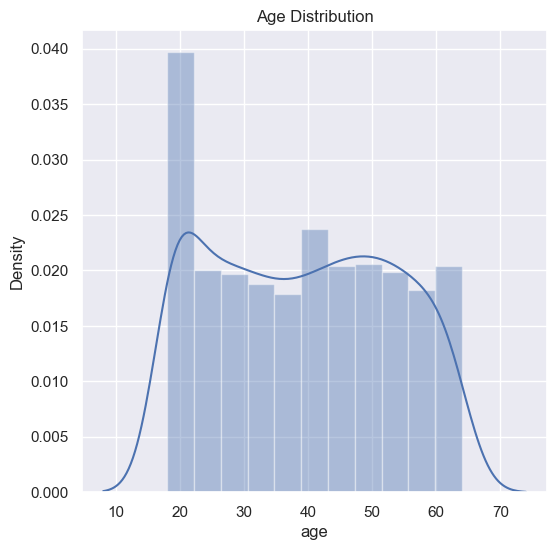

In [38]:
#age distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

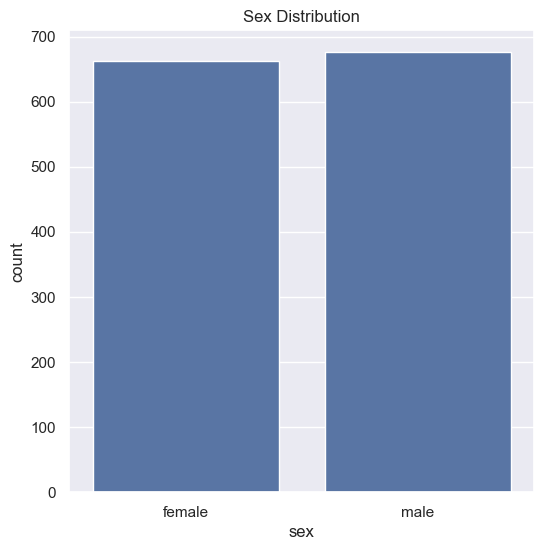

In [40]:
#Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=data)
plt.title("Sex Distribution")
plt.show()

In [42]:
data["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_2836\1680175416.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


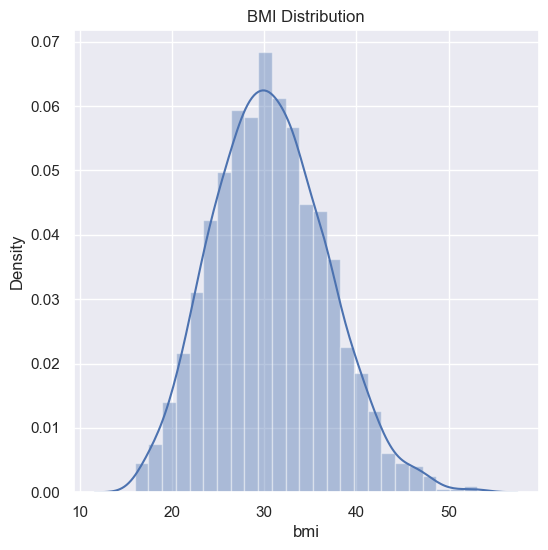

In [53]:
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

In [ ]:
Normal BMI is 18.5 to 24.9

In [139]:
normal_bmi_count=data[(data['bmi']>=18.5)& (data['bmi']<=24.9)].shape[0]

In [141]:
normal_bmi_count

222

In [121]:
inner_bmi_count=data[(data['bmi']<18.5)].shape[0]

In [123]:
inner_bmi_count

20

In [133]:
outer_bmi_count=data[data['bmi']>24.9].shape[0]

In [135]:
outer_bmi_count

1096

In [137]:
data.shape

(1338, 7)

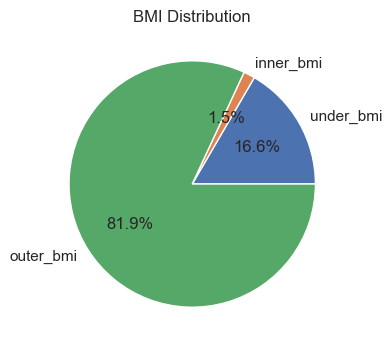

In [159]:
labels=['under_bmi','inner_bmi','outer_bmi']
sizes=[normal_bmi_count,inner_bmi_count,outer_bmi_count]

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',)
plt.title('BMI Distribution')
plt.show()

In [169]:
# Children_column
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

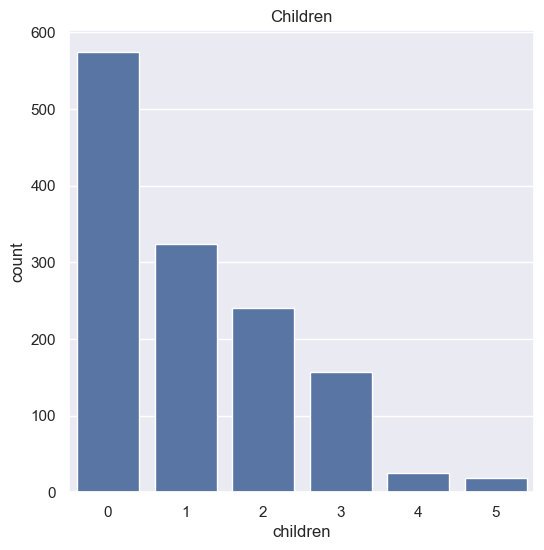

In [164]:

plt.figure(figsize=(6,6))
sns.countplot(x='children', data=data)
plt.title('Children')
plt.show()

In [171]:
# Smoker_Column

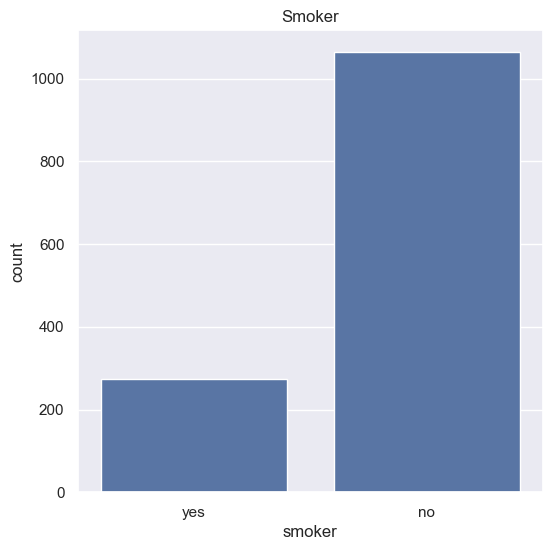

In [173]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=data)
plt.title('Smoker')
plt.show()

In [175]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

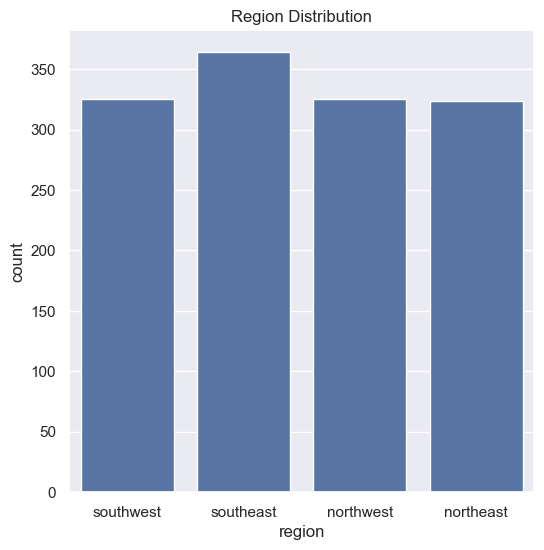

In [177]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=data)
plt.title('Region Distribution')
plt.show()

In [179]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_2836\2087152160.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


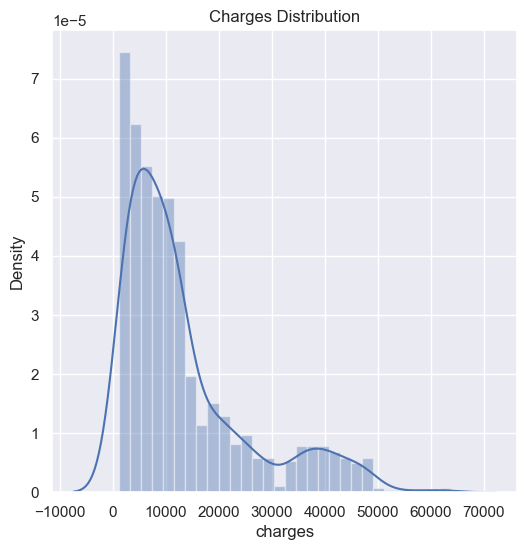

In [185]:
plt.figure(figsize=(6,6))
sns.distplot(data['charges'])
plt.title("Charges Distribution")
plt.show()

In [191]:
#sex column
data.replace({"sex":{'male':0,"female":1}},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2836\474409297.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sex":{'male':0,"female":1}},inplace=True)


In [197]:
#Smoker column
data.replace({'smoker':{'yes':0,"no":1}},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2836\2072155987.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'smoker':{'yes':0,"no":1}},inplace=True)


In [201]:
#region column
data.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2836\1787034268.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace=True)


In [203]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [213]:
x=data.iloc[:,:-1]

y=data["charges"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)

In [215]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [220]:
lr=LinearRegression()

In [222]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#model Evaluation

In [238]:
train_prediction=lr.predict(x_train) 

In [240]:
# R_square value

In [242]:
r2_train=metrics.r2_score(y_train,train_prediction)

In [244]:
r2_train

0.751505643411174

In [246]:
test_prediction =lr.predict(x_test)


In [248]:
r2_test=metrics.r2_score(y_test,test_prediction)
r2_test

0.7447273869684077

In [250]:
input_data=(31,1,25.74,0,1,0)
#change the tuple data as numpy arr
id_as_npa=np.asarray(input_data)

input_data_reshape=id_as_npa.reshape(1,-1)

In [256]:
predictor=lr.predict(input_data_reshape)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [258]:
predictor

array([3760.0805765])

In [274]:
print("The Insurance Cost in USD is",predictor[0])

The Insurance Cost in USD is 3760.0805764960514
